In [1]:
import pandas as pd 
import numpy as np

In [2]:
df_sample_submission = pd.read_csv('Data/sample_submission.csv')

In [3]:
df_sample_submission.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [4]:
df_train = pd.read_csv('Data/train.csv')

In [5]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
lst = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
       'SaleType', 'SaleCondition']

def converted_types(columns):
    for column in columns:
        df_train[column] = df_train[column].astype('category').cat.codes
        
converted_types(lst)

In [8]:
lst = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 
       'PoolQC', 'Fence', 'MiscFeature']

def filled_values(columns):
    for column in columns:
        df_train[column].fillna(int(df_train[column].mean()), inplace=True)
        
filled_values(lst)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int8   
 8   LandContour    1460 non-null   int8   
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   int8   
 11  LandSlope      1460 non-null   int8   
 12  Neighborhood   1460 non-null   int8   
 13  Condition1     1460 non-null   int8   
 14  Condition2     1460 non-null   int8   
 15  BldgType       1460 non-null   int8   
 16  HouseStyle     1460 non-null   int8   
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df_test = pd.read_csv('Data/test.csv')

In [11]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
lst = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
       'SaleCondition']

def converted_types(columns):
    for column in columns:
        df_test[column] = df_test[column].astype('category').cat.codes
        
converted_types(lst)

In [14]:
lst = ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']

def filled_values(columns):
    for column in columns:
        df_test[column].fillna(int(df_test[column].mean()), inplace=True)
        
filled_values(lst)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   Alley          1459 non-null   int8   
 7   LotShape       1459 non-null   int8   
 8   LandContour    1459 non-null   int8   
 9   Utilities      1459 non-null   int8   
 10  LotConfig      1459 non-null   int8   
 11  LandSlope      1459 non-null   int8   
 12  Neighborhood   1459 non-null   int8   
 13  Condition1     1459 non-null   int8   
 14  Condition2     1459 non-null   int8   
 15  BldgType       1459 non-null   int8   
 16  HouseStyle     1459 non-null   int8   
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


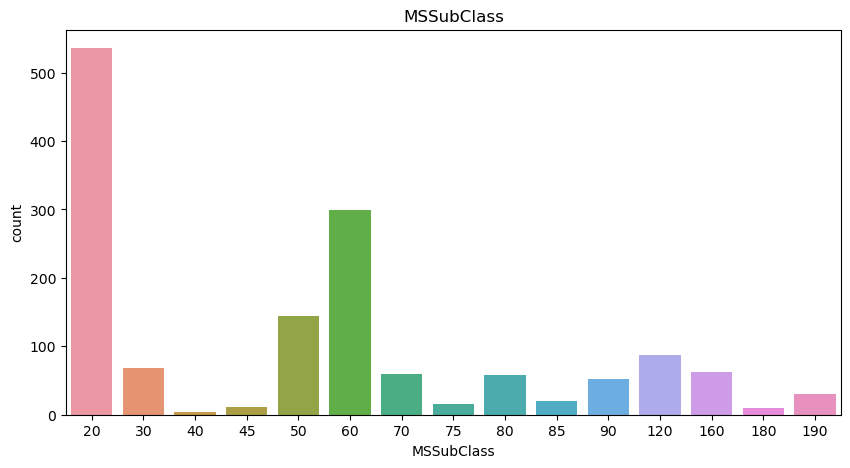

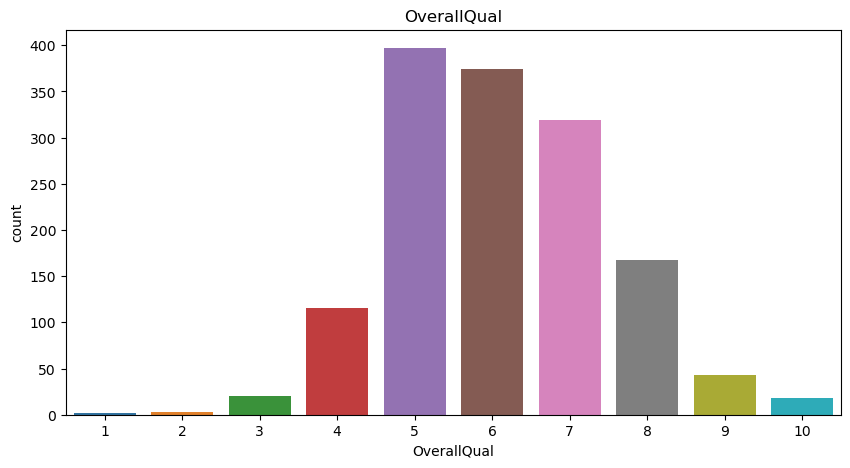

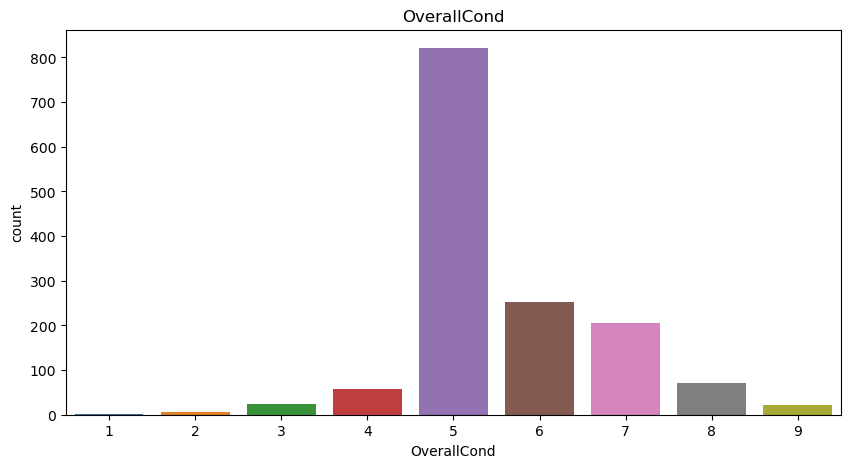

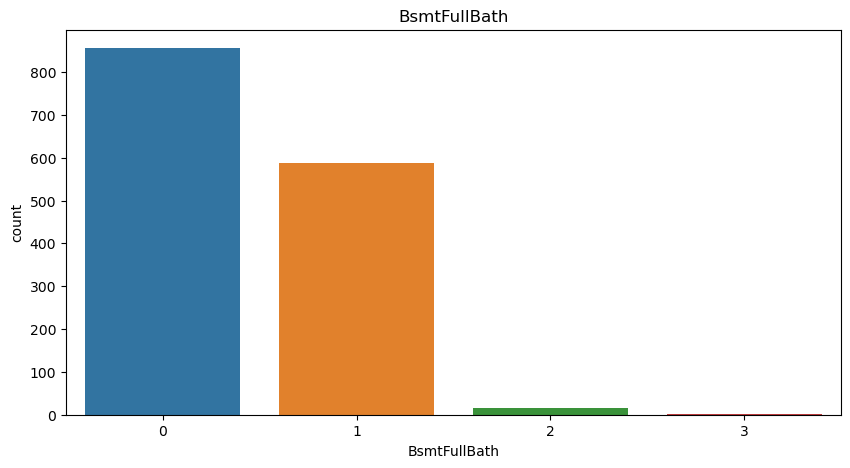

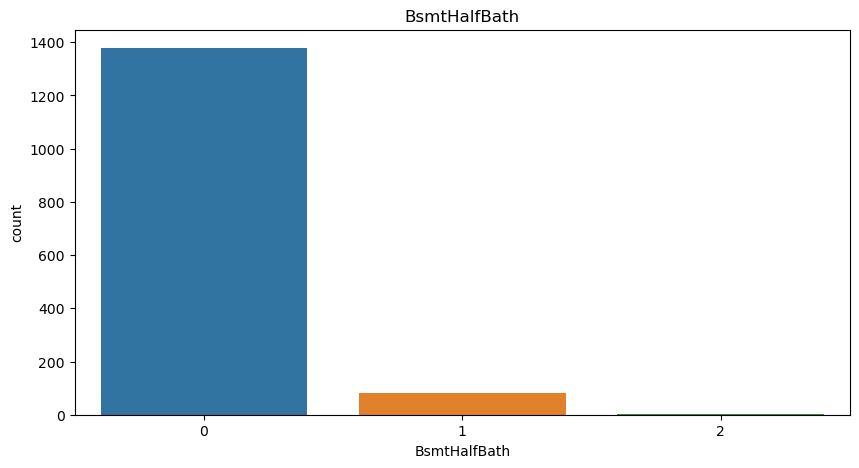

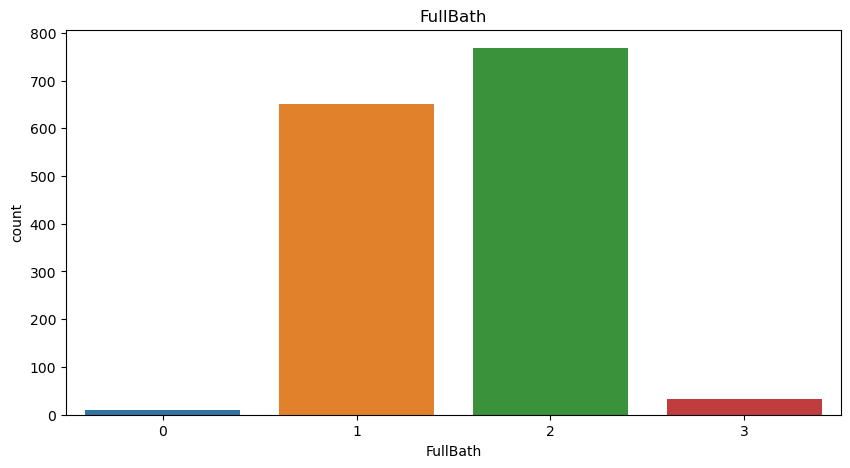

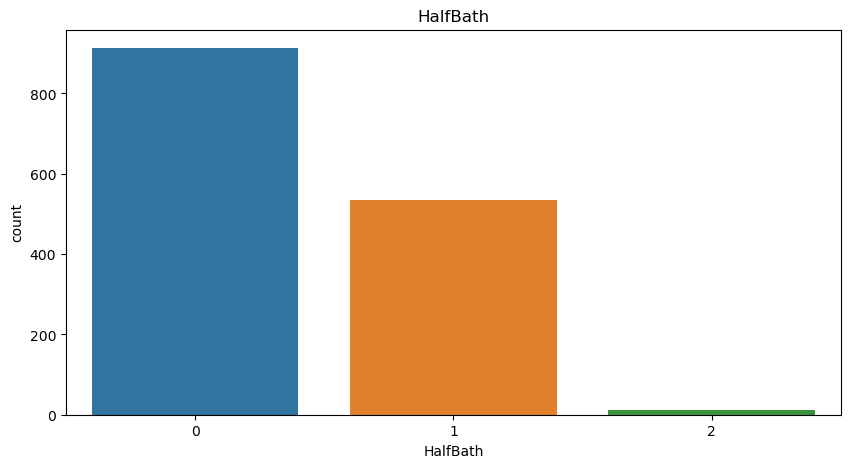

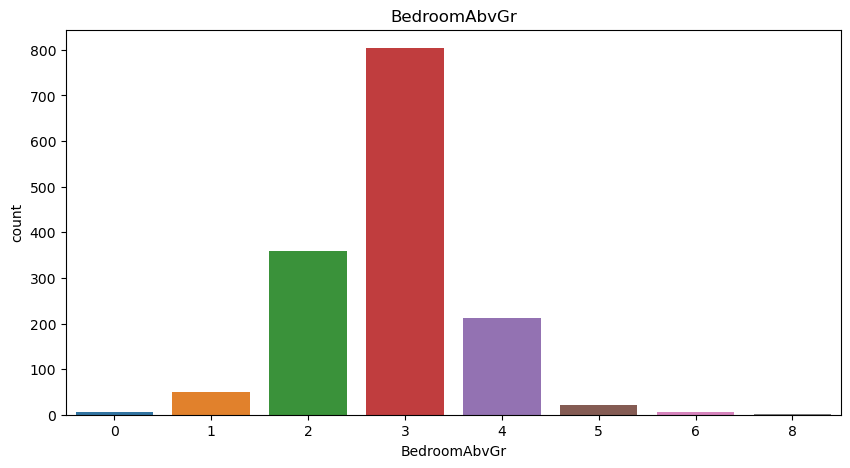

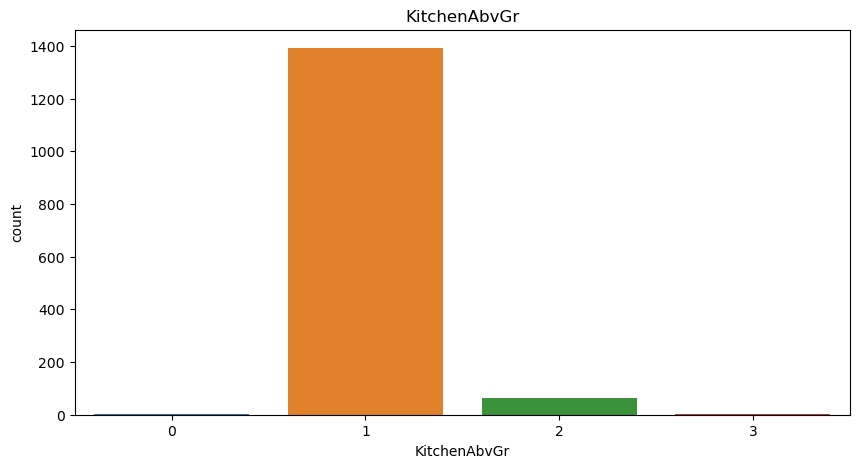

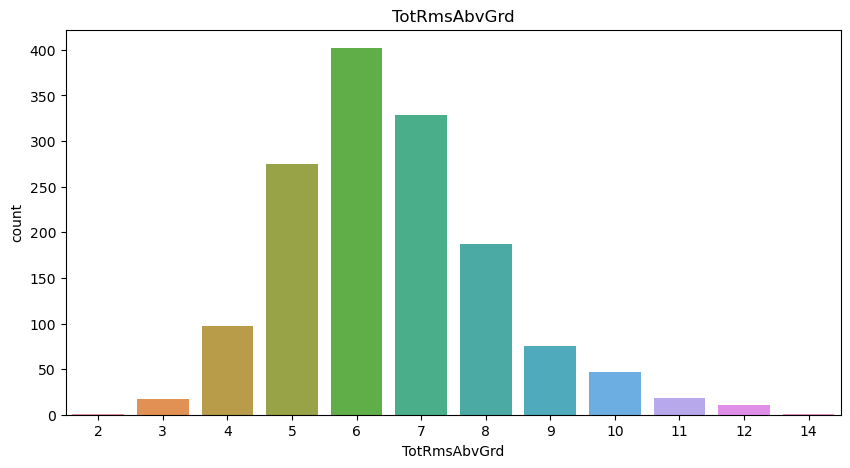

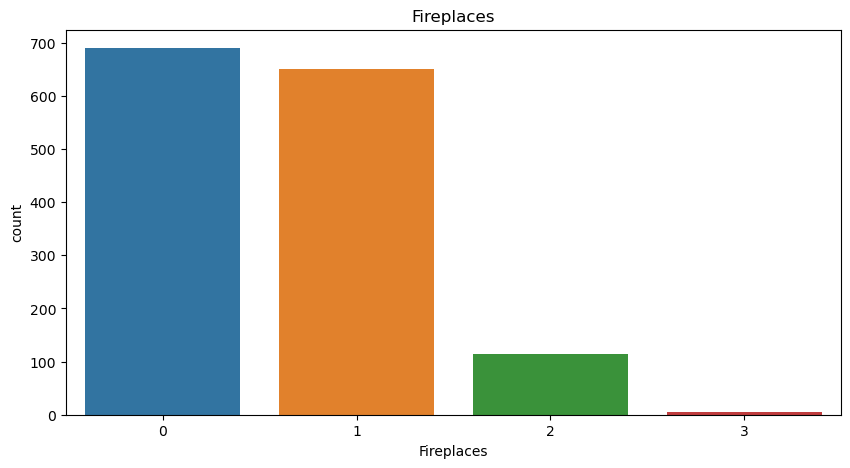

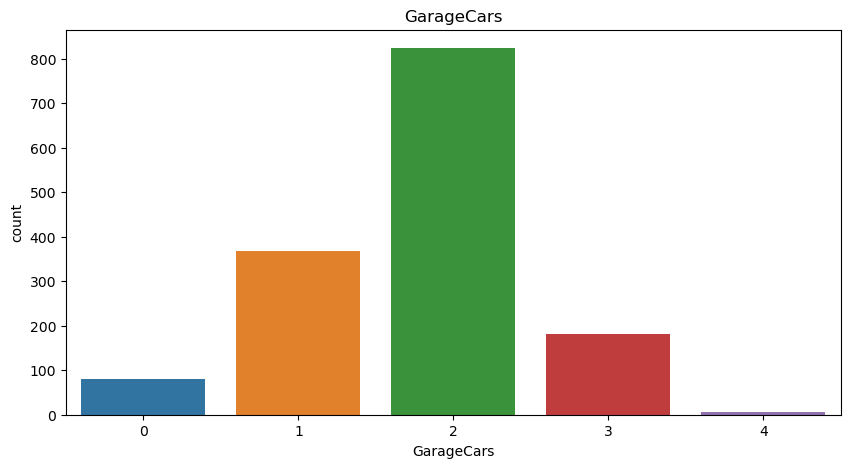

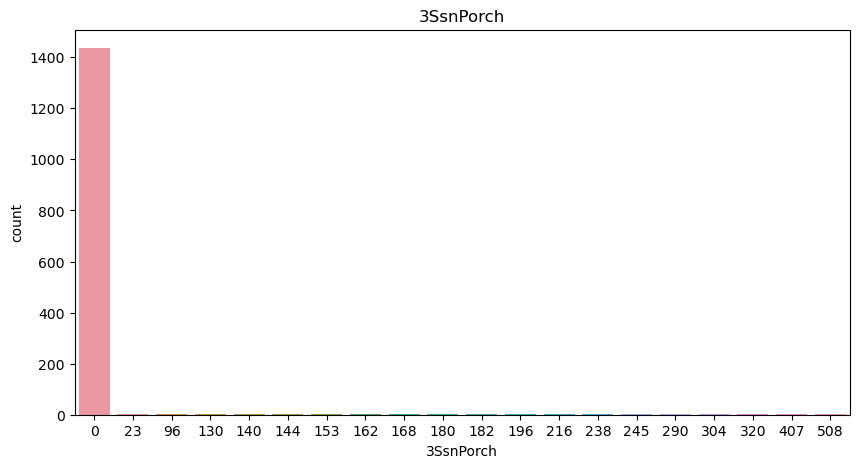

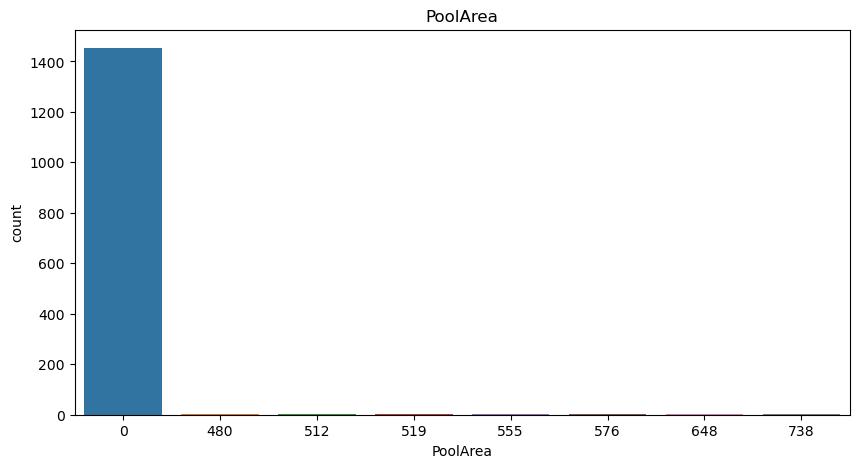

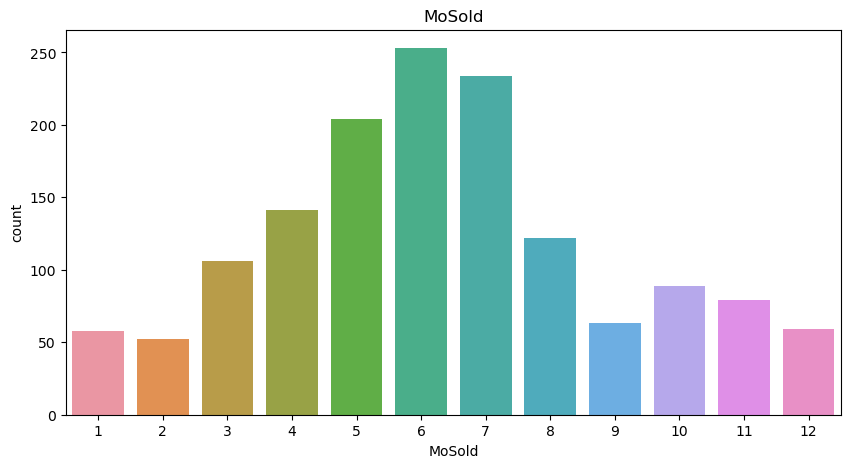

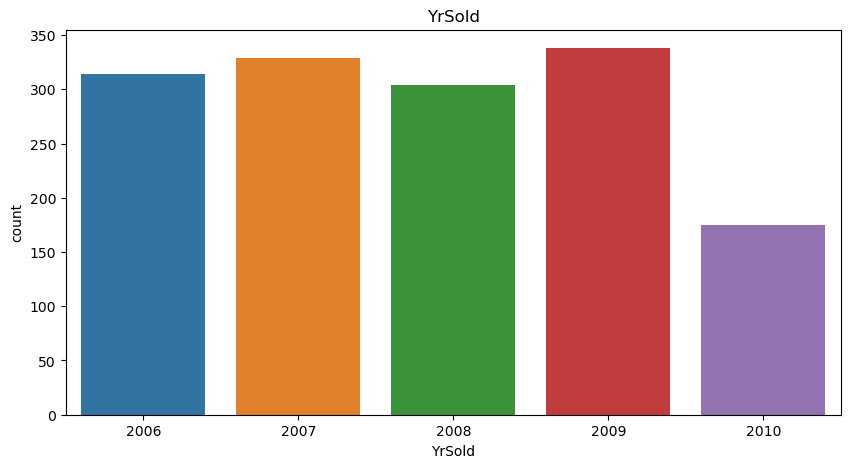

In [17]:
columns = df_train.select_dtypes(include=['int']).columns.tolist()
print(columns)

for column in columns[:]:
    if df_train[column].value_counts().shape[0] > 20:
        columns.remove(column)
        
for column in columns:
    sns.countplot(x=column, data=df_train)
    
    plt.title(column)
    plt.show()

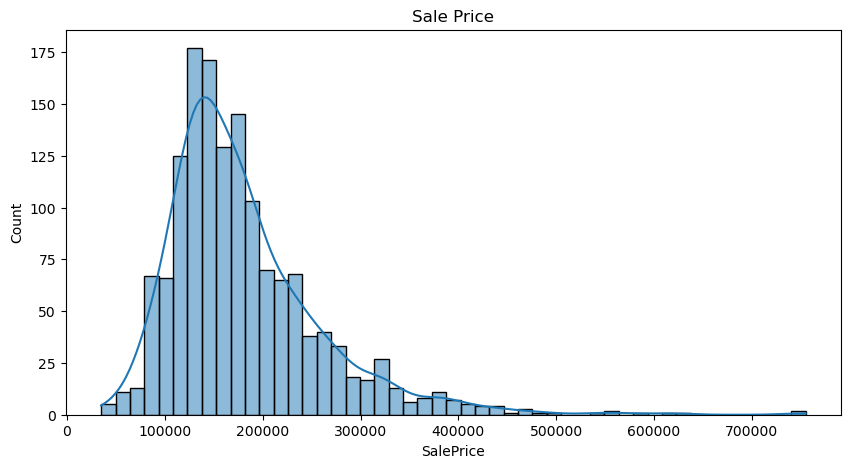

In [18]:
sns.histplot(x='SalePrice', kde=True, data=df_train)

plt.title('Sale Price')
plt.show()

In [19]:
x = df_train.drop(columns=['SalePrice'])
y = df_train.SalePrice

In [20]:
print('x Shape:', x.shape)
print('y Shape:', y.shape)

x Shape: (1460, 80)
y Shape: (1460,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [23]:
print('x train Shape:', x_train.shape)
print('y train Shape:', y_train.shape)

x train Shape: (1022, 80)
y train Shape: (1022,)


In [24]:
print('x test Shape:', x_test.shape)
print('y test Shape:', y_test.shape)

x test Shape: (438, 80)
y test Shape: (438,)


# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linear = LinearRegression()
# linear.fit(x, y)
linear.fit(x_train, y_train)

LinearRegression()

In [27]:
# print('Score:', linear.score(x, y))
print('Score:', linear.score(x_test, y_test))

Score: 0.8148245326022131


In [28]:
# yhat_linear = linear.predict(x)
yhat_linear = linear.predict(x_test)

C:\Users\anhvu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anhvu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


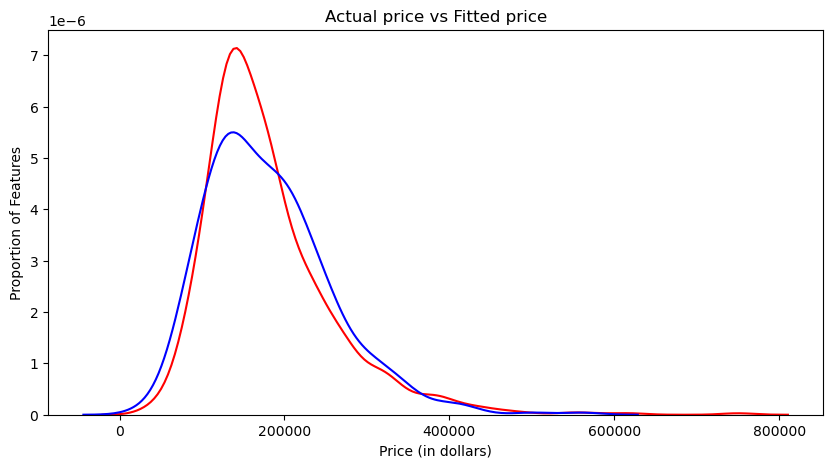

In [29]:
ax1 = sns.distplot(df_train['SalePrice'], hist = False, color = "r", label = "Actual Value")
sns.distplot(yhat_linear, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title('Actual price vs Fitted price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Features')
plt.show()

# Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

In [31]:
rr = Ridge(alpha=0.1)
# rr.fit(x, y)
rr.fit(x_train, y_train)

Ridge(alpha=0.1)

In [32]:
# print('Score:', rr.score(x, y))
print('Score:', rr.score(x_test, y_test))

Score: 0.8151819833607228


In [33]:
# yhat_rr = rr.predict(x)
yhat_rr = rr.predict(x_test)

C:\Users\anhvu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anhvu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


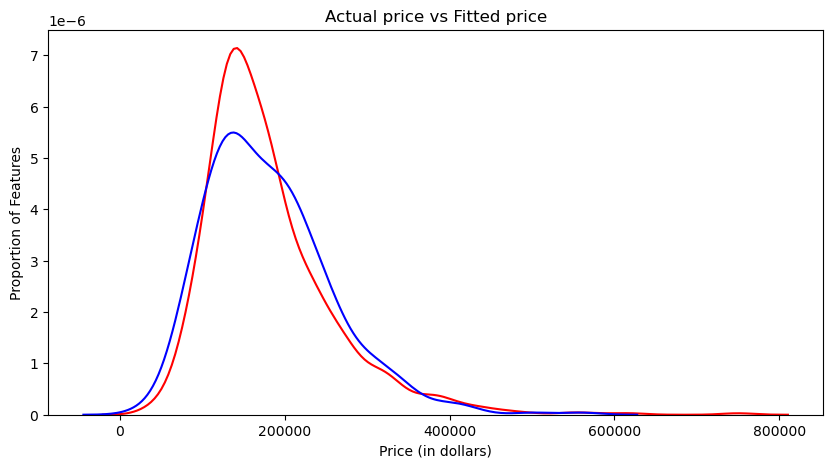

In [34]:
ax1 = sns.distplot(df_train['SalePrice'], hist=False, color='r', label='Actual Price')
sns.distplot(yhat_rr, hist=False, color='b', label='Fitted Price', ax=ax1)

plt.title('Actual price vs Fitted price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Features')
plt.show()

# Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rfr = RandomForestRegressor(n_estimators=100)
# rfr.fit(x, y)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
# print('Score:', rfr.score(x, y))
print('Score:', rfr.score(x_test, y_test))

Score: 0.8402567479983925


In [38]:
# yhat_rfr = rfr.predict(x)
yhat_rfr = rfr.predict(x_test)

C:\Users\anhvu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anhvu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


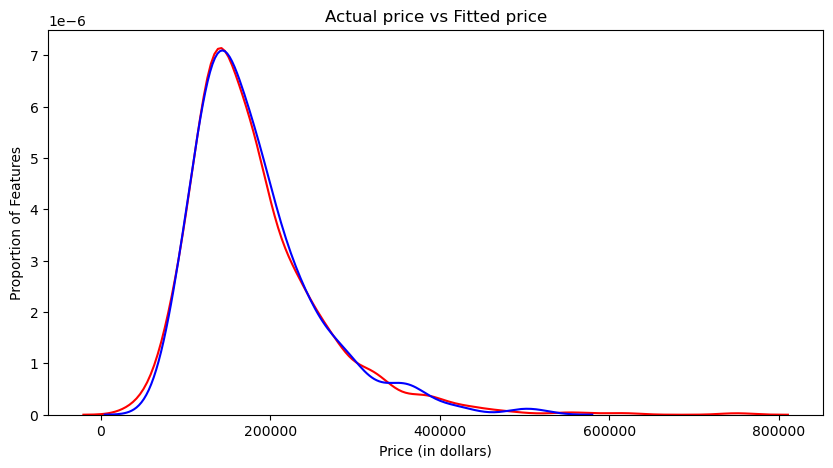

In [39]:
ax1 = sns.distplot(df_train['SalePrice'], hist=False, color='r', label='Actual Price')
sns.distplot(yhat_rfr, hist=False, color='b', label='Fitted Price', ax=ax1)

plt.title('Actual price vs Fitted price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Features')
plt.show()

# Gradient Boosting Regressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
gbr = GradientBoostingRegressor(n_estimators=100)
# gbr.fit(x, y)
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [42]:
# print('Score:', gbr.score(x, y))
print('Score:', gbr.score(x_test, y_test))

Score: 0.8590577339253963


In [43]:
# yhat_gbr = gbr.predict(x)
yhat_gbr = gbr.predict(x_test)

C:\Users\anhvu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anhvu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


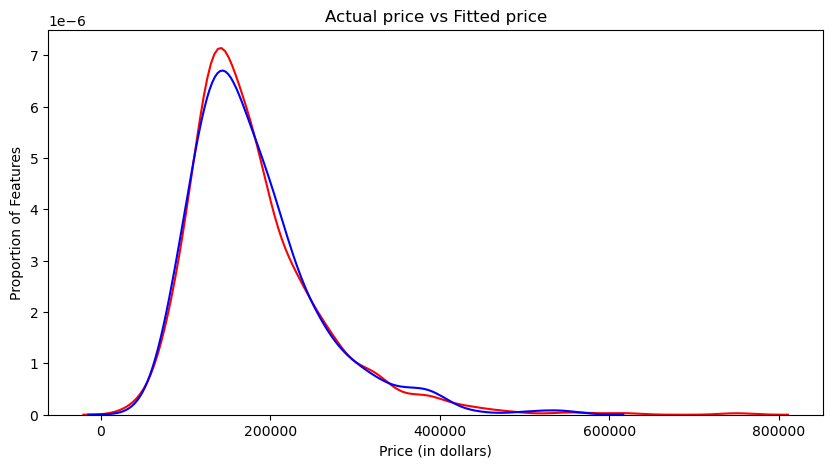

In [44]:
ax1 = sns.distplot(df_train['SalePrice'], hist=False, color='r', label='Actual Price')
sns.distplot(yhat_gbr, hist=False, color='b', label='Fitted Price', ax=ax1)

plt.title('Actual price vs Fitted price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Features')
plt.show()

In [45]:
col1 = df_test.Id
col2 = gbr.predict(df_test)

In [46]:
df1 = pd.DataFrame(col1, columns=['Id'])
df2 = pd.DataFrame(col2, columns=['SalePrice'])

results = pd.concat([df1, df2], axis=1, join='inner')

In [47]:
results.to_csv('Submission.csv', index=False)

In [48]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
